In [1]:
# Predictive Modeling with Linear Regression 
# Build a predictive model using linear regression to predict a numerical outcome based on one or more features. 
# Use a dataset with a continuous target variable.

In [2]:
# dataset link = https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/input

In [3]:
# Import the necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

In [4]:
# Load the dataset
data = pd.read_csv('downloads/day.csv') 

# Display the first 5 rows 
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
# displays the shape of the data
data.shape

(730, 16)

In [6]:
# checks foe null values and add it for data pre processing
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# finds and displays some statistical observations of the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Convert dteday to datetime for easy analysis
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

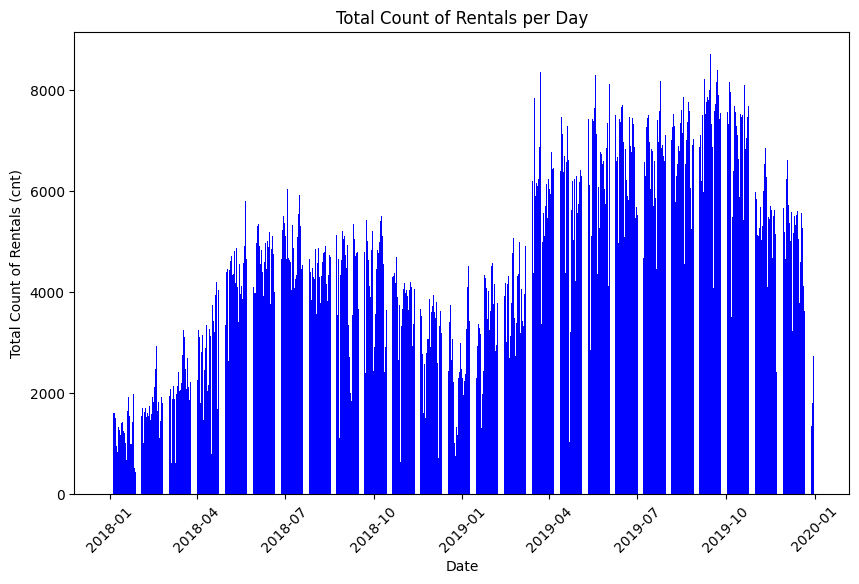

In [9]:
# Plotting the total count of rentals for each day
plt.figure(figsize=(10, 6))
plt.bar(data['dteday'], data['cnt'], color='blue')

plt.title('Total Count of Rentals per Day')
plt.xlabel('Date')
plt.ylabel('Total Count of Rentals (cnt)')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Simple Linear Regression
X_simple = data[['temp']]
y = data['cnt']

# Adding constant term for intercept
X_simple = sm.add_constant(X_simple)

# Fit the model
model_simple = sm.OLS(y, X_simple).fit()

# summary of the models
simple_summary = model_simple.summary()
print(simple_summary)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.07e-81
Time:                        20:16:02   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.0403    161.278      7.577      0.0

In [11]:
# Multiple Linear Regression
features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'weathersit']
X_multiple = data[features]

# Adding constant term for intercept
X_multiple = sm.add_constant(X_multiple)

# Fit the model
model_multiple = sm.OLS(y, X_multiple).fit()

# summary of the models
multiple_summary = model_multiple.summary()
print(multiple_summary)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          3.61e-111
Time:                        20:16:02   Log-Likelihood:                -6293.6
No. Observations:                 730   AIC:                         1.260e+04
Df Residuals:                     723   BIC:                         1.263e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3296.3706    343.054      9.609      0.0

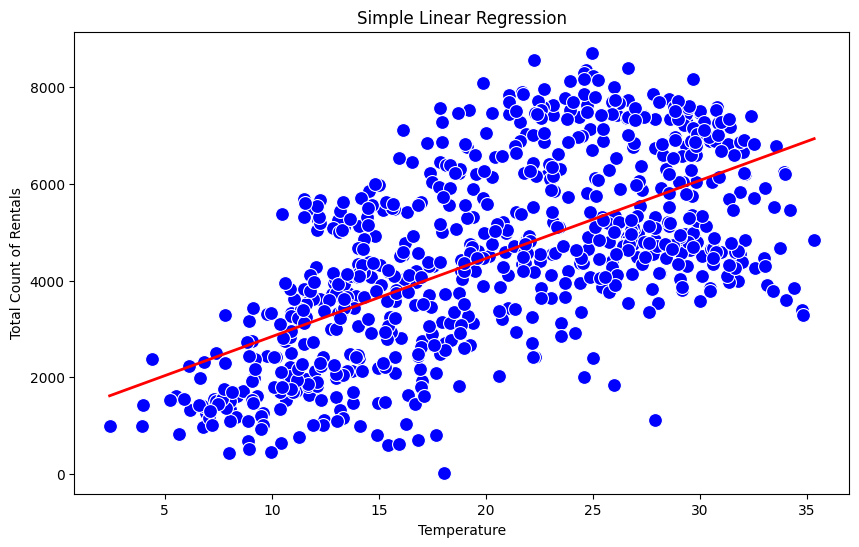

In [12]:
# plotting for regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data, color='blue', s=100)

# Regression line
X_pred = pd.DataFrame({'temp': [data['temp'].min(), data['temp'].max()]})
X_pred = sm.add_constant(X_pred)
y_pred = model_simple.predict(X_pred)

plt.plot(X_pred['temp'], y_pred, color='red', linewidth=2)

plt.title('Simple Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Total Count of Rentals')
plt.show()

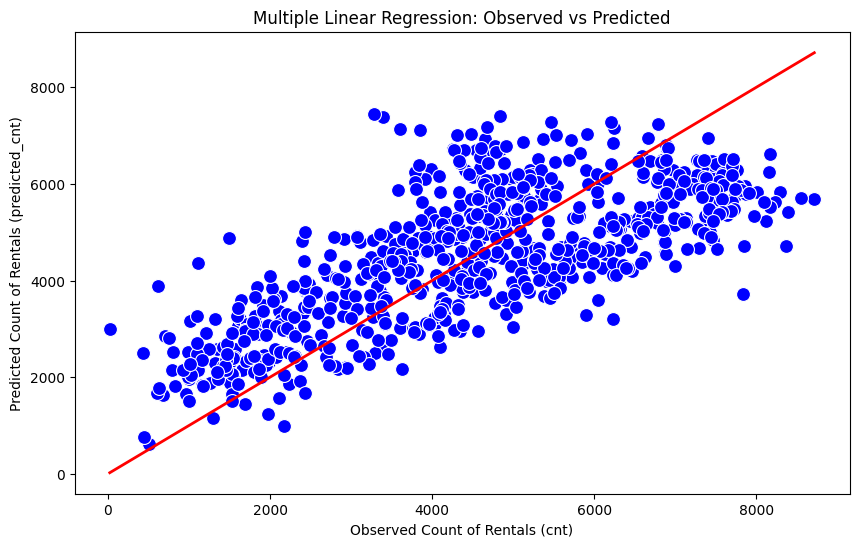

In [13]:
data['predicted_cnt'] = model_multiple.predict(X_multiple)

# Plotting observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cnt', y='predicted_cnt', data=data, color='blue', s=100)

# Plotting the ideal fit line
plt.plot([data['cnt'].min(), data['cnt'].max()], [data['cnt'].min(), data['cnt'].max()], color='red', linewidth=2)

plt.title('Multiple Linear Regression: Observed vs Predicted')
plt.xlabel('Observed Count of Rentals (cnt)')
plt.ylabel('Predicted Count of Rentals (predicted_cnt)')
plt.show()

In [15]:
# Select features and target variable
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = data[features]
y = data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)
p = len(features) # Number of predictors
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])

print(coefficients)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Adjusted R-squared: {adj_r2}")

NameError: name 'r2' is not defined

In [35]:
# Define the new data for prediction
new_data = [
    [1, 1, 0, 1, 0, 6, 0, 2, 14.110847, 18.18125, 80.5833],
    [2, 1, 0, 1, 0, 0, 0, 2, 14.902598, 17.68695, 69.6087]
]

# Perform predictions
predictions = model.predict(new_data)

# Print the results
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Prediction {i+1}: {prediction}")

Predictions:
Prediction 1: 3081.6385034433756
Prediction 2: 3228.3707350601267


C:\Users\Roshini\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
